# Batch Attack Results Analysis
Analyze results from batch adversarial attacks in `batch_attack_results/`.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, display


## 1. Load All Per-Run Results CSVs

In [2]:
import os
print("Current working directory:", os.getcwd())
results_dir = 'batch_attack_results'
csv_files = glob.glob(os.path.join(results_dir, 'results_tgt-*.csv'))
print(f'Found {len(csv_files)} results CSVs:', csv_files)
if not csv_files:
    raise FileNotFoundError("No results CSVs found. Check your path and working directory.")
df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)
print(f'Combined dataframe shape: {df.shape}')
df.head()

Current working directory: /Users/henrybloom/Desktop/TTIC 31110/Project/blackbox-speech-attacks
Found 54 results CSVs: ['batch_attack_results/results_tgt-an4-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-HELLO_WORLD.csv', 'batch_attack_results/results_tgt-an4-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-TEST_PHRASE.csv', 'batch_attack_results/results_tgt-an4-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-1234567890.csv', 'batch_attack_results/results_tgt-librispeech-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-TEST_PHRASE.csv', 'batch_attack_results/results_tgt-librispeech-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-HELLO_WORLD.csv', 'batch_attack_results/results_tgt-ted-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-HELLO_WORLD.csv', 'batch_attack_results/results_tgt-ted-v2_ens-librispeech-v1_librispeech-v2_ted-v2_an4-v1_an4-v2_sent-TEST_PHRASE.csv', 'batch_attack_results/results_tg

,adv_wav_path,input_wav,target_sentence,target_model,target_version,ensemble_models,attack_params,target_pred,target_lev_dist,ensemble_preds,ensemble_lev_dists,target_loss_hist,ensemble_loss_hists,max_db_diff
0,batch_attack_results/adv_an4-v2__ens_librispee...,processed_sound/normal0.wav,HELLO WORLD,an4,v2,"[{""training_set"": ""librispeech"", ""version"": ""v...","{""epsilon"": 0.03, ""alpha"": 0.001, ""PGD_iter"": ...",OE TFOLOUTR HOUS FIF NINE ONE ZS IOS,32,NaN,NaN,"[35.49290466308594, 35.43971252441406, 35.1377...","[[85.30571746826172, 71.31448364257812, 70.070...",0.006490
1,batch_attack_results/adv_an4-v2__ens_librispee...,processed_sound/normal0.wav,TEST PHRASE,an4,v2,"[{""training_set"": ""librispeech"", ""version"": ""v...","{""epsilon"": 0.03, ""alpha"": 0.001, ""PGD_iter"": ...",OE FOLOUTR UOUS FIFN NIRE ONE SOS INE,32,NaN,NaN,"[41.85121536254883, 41.255313873291016, 41.808...","[[77.9100570678711, 56.9998779296875, 44.98735...",0.005555
2,batch_attack_results/adv_an4-v2__ens_librispee...,processed_sound/normal0.wav,1234567890,an4,v2,"[{""training_set"": ""librispeech"", ""version"": ""v...","{""epsilon"": 0.03, ""alpha"": 0.001, ""PGD_iter"": ...",OE FOLOUTR HUOUS FIFN NINE ONH S OS OINE,41,NaN,NaN,"[2650.959716796875, 2653.30908203125, 2655.794...","[[1169.802490234375, 928.87353515625, 779.9339...",0.004842
3,batch_attack_results/adv_librispeech-v2__ens_l...,processed_sound/normal0.wav,TEST PHRASE,librispeech,v2,"[{""training_set"": ""librispeech"", ""version"": ""v...","{""epsilon"": 0.03, ""alpha"": 0.001, ""PGD_iter"": ...",WITTHOU THE THAT ASSET THE ARCLIGLYNSIUSIE,33,NaN,NaN,"[65.98934936523438, 65.31916046142578, 58.0891...","[[77.9100570678711, 51.623958587646484, 58.338...",0.004513
4,batch_attack_results/adv_librispeech-v2__ens_l...,processed_sound/normal0.wav,HELLO WORLD,librispeech,v2,"[{""training_set"": ""librispeech"", ""version"": ""v...","{""epsilon"": 0.03, ""alpha"": 0.001, ""PGD_iter"": ...",WHATTHOU THE THAT ASSEIT THE ARTICOR USENESS,39,NaN,NaN,"[77.19696807861328, 77.02430725097656, 73.7069...","[[85.30571746826172, 69.136962890625, 70.67707...",0.005591


## 2. Basic Summary Stats
Show some basic statistics and value counts for key columns.

In [3]:
df.describe(include='all')

,adv_wav_path,input_wav,target_sentence,target_model,target_version,ensemble_models,attack_params,target_pred,target_lev_dist,ensemble_preds,ensemble_lev_dists,target_loss_hist,ensemble_loss_hists,max_db_diff
count,54,54,48,54,54,54,54,54,54.000000,0.0,0.0,54,54,54.000000
unique,54,1,9,3,1,6,1,45,NaN,NaN,NaN,45,45,NaN
top,batch_attack_results/adv_an4-v2__ens_librispee...,processed_sound/normal0.wav,HELLO WORLD,an4,v2,"[{""training_set"": ""librispeech"", ""version"": ""v...","{""epsilon"": 0.03, ""alpha"": 0.001, ""PGD_iter"": ...",WITHOUT TA DATASET THE ARDTY QOSE USEFE,NaN,NaN,NaN,"[1238.515380859375, 1107.9727783203125, 1090.4...","[[1169.802490234375, 919.1166381835938, 725.32...",NaN
freq,1,54,6,18,54,9,54,3,NaN,NaN,NaN,3,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.111111,NaN,NaN,NaN,NaN,0.005500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054658,NaN,NaN,NaN,NaN,0.000836
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,0.003798
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,0.005019
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.500000,NaN,NaN,NaN,NaN,0.005355
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,0.006074


In [4]:
print('Target Models:', df['target_model'].value_counts())
print('Target Versions:', df['target_version'].value_counts())
print('Target Sentences:', df['target_sentence'].value_counts().head(10))

Target Models: an4            18
librispeech    18
ted            18
Name: target_model, dtype: int64
Target Versions: v2    54
Name: target_version, dtype: int64
Target Sentences: HELLO WORLD                                    6
TEST PHRASE                                    6
1234567890                                     6
HENRY                                          6
!@#$%^&*()_+                                   6
the quick brown fox jumps over the lazy dog    6
QWERTYUIOPASDFGHJKLZXCVBNM                     6
abcdefghijklmnopqrstuvwxyz                     3
ABCDEFGHIJKLMNOPQRSTUVWXYZ                     3
Name: target_sentence, dtype: int64


## 3. Visualizations
### Levenshtein Distance Distribution

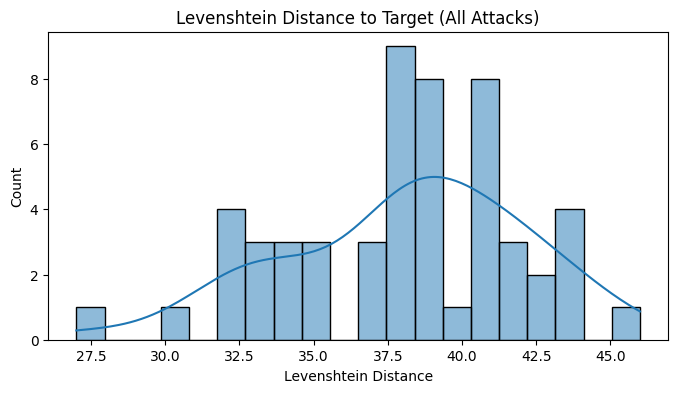

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['target_lev_dist'], bins=20, kde=True)
plt.title('Levenshtein Distance to Target (All Attacks)')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Count')
plt.show()

### By Target Model/Ensemble
Plot Levenshtein distance grouped by target model and ensemble.

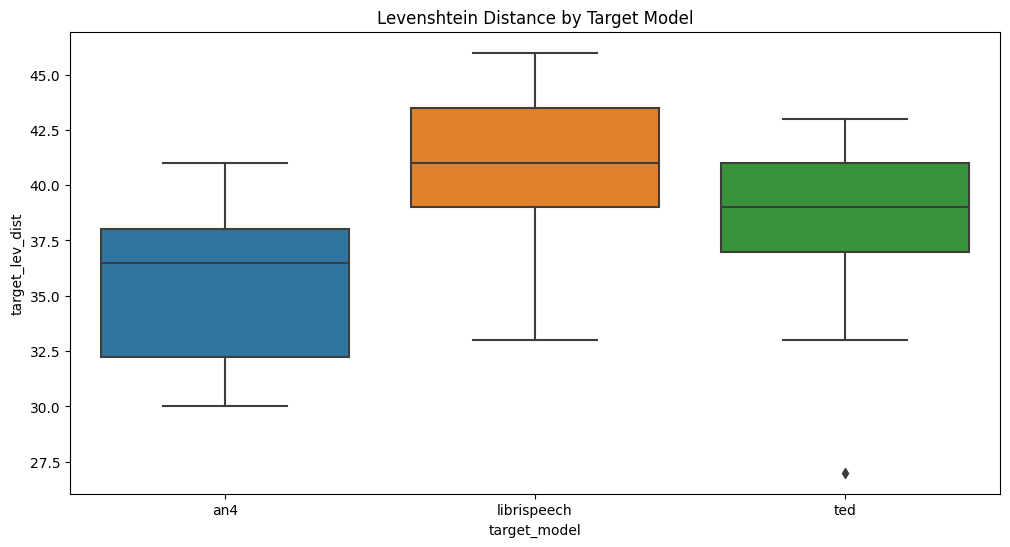

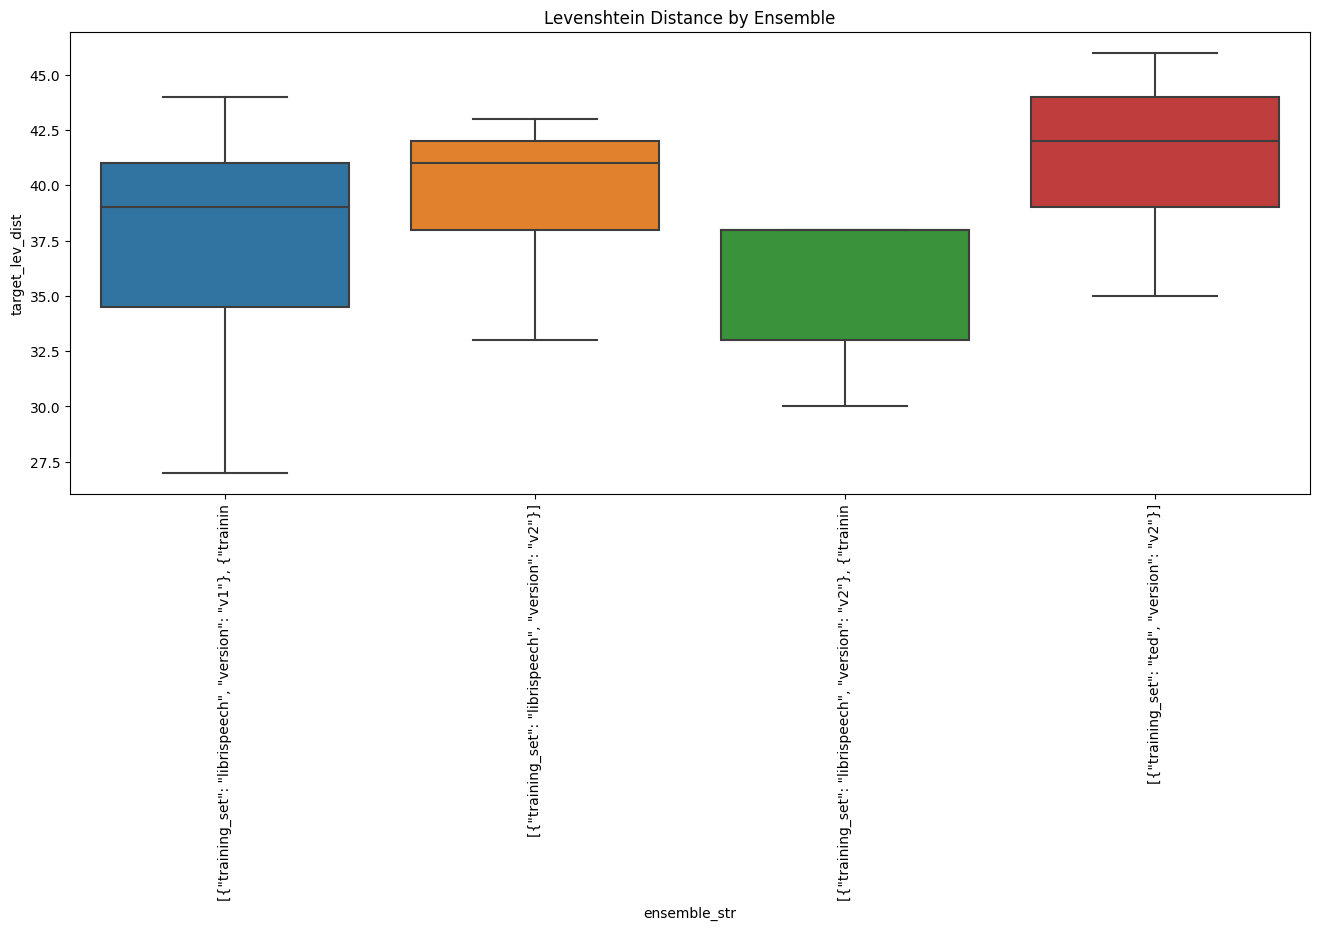

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target_model', y='target_lev_dist', data=df)
plt.title('Levenshtein Distance by Target Model')
plt.show()

plt.figure(figsize=(16,6))
df['ensemble_str'] = df['ensemble_models'].apply(lambda x: str(x)[:60])
sns.boxplot(x='ensemble_str', y='target_lev_dist', data=df)
plt.xticks(rotation=90)
plt.title('Levenshtein Distance by Ensemble')
plt.show()

## 4. Inspect/Play Example Adversarial WAVs
Pick a row to listen to the adversarial output.

In [7]:
row = df.sample(1).iloc[0]
wav_path = row['adv_wav_path']
print(f'Playing: {wav_path}')
display(Audio(wav_path))
print('Target Sentence:', row['target_sentence'])
print('Predicted:', row['target_pred'])
print('Levenshtein:', row['target_lev_dist'])

Playing: batch_attack_results/adv_librispeech-v2__ens_librispeech-v1_ted-v2_an4-v1_an4-v2__tgt_the_quick_brown_fox_jumps_over_the_lazy_dog.wav


Target Sentence: the quick brown fox jumps over the lazy dog
Predicted: AT THOU THE THAT IS SAT FIYAONE CORSEUSESS
Levenshtein: 41


## 5. Analyze Summary CSVs/Plots
(Optional) Load and plot any summary CSVs, e.g. ensemble loss histories.

In [8]:
summary_files = glob.glob(os.path.join(results_dir, '*.csv'))
summary_files = [f for f in summary_files if 'results_tgt-' not in f]  # Exclude per-run
for f in summary_files:
    print(f"\n--- {os.path.basename(f)} ---")
display(pd.read_csv(f).head())


--- target_levenshtein_distances.csv ---

--- ensemble_levenshtein_histories.csv ---

--- ensemble_loss_histories.csv ---


,librispeech_v2,ted_v2,target_an4_v2
0,975.925110,1238.515381,2650.959717
1,734.408203,793.791138,2645.810059
2,600.484863,563.093628,2646.751709
3,734.085938,400.273529,2638.923340
4,592.003418,333.202179,2628.670898
